In [31]:
# Bu notebook'umuzda el yazısı verisini LeNet-5 kullanarak ayırt etmeye çalışacağız.
# Öncelikle verimizi almamız gerekiyor. (Bu notebook hızlı olması bakımından google colab ortamında GPU kullanılarak çalıştırılmıştır)
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
# Şimdi test ve train sayılarına ve matriks boyutlarına bakalım.
print(f"Train X = {X_train.shape}, y = {y_train.shape}")
print(f"Test X = {X_test.shape}, y = {y_test.shape}")

Train X = (60000, 28, 28), y = (60000,)
Test X = (10000, 28, 28), y = (10000,)


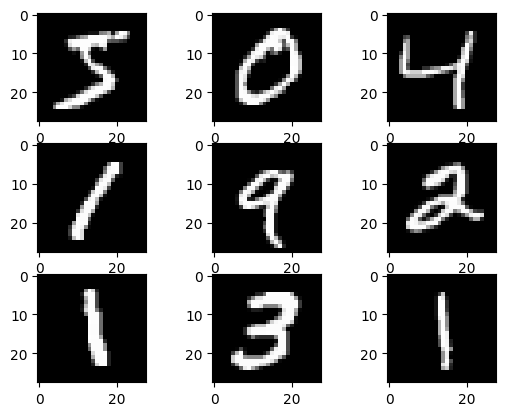

In [33]:
# Şimdi örnek olarak birkaç veriye bakalım.
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [34]:
# Görüldüğü üzere verimiz el yazması sayılardan oluşmakta şimdi size verimizi modele sokmadan önce
# 2'nin üssü bir şekilde olması için zero-padding yapıp matriks şeklini (32,32) yapıcaz ve
# verileri normalize edeceğiz.
import numpy as np
X_train_padded = np.pad(X_train, ((0,0),(2,2),(2,2)), 'constant')
X_test_padded = np.pad(X_test, ((0,0),(2,2),(2,2)), 'constant')

In [35]:
X_train_padded.shape, X_test_padded.shape

((60000, 32, 32), (10000, 32, 32))

In [37]:
# Şimdi ise padlediğimiz verileri normalize edelim.
X_train_padded = X_train_padded.astype('float32')
X_test_padded = X_test_padded.astype('float32')
X_train_padded /= 255
X_test_padded /= 255
print(np.min(X_train_padded), np.min(X_test_padded))
print(np.max(X_train_padded), np.max(X_test_padded))

0.0 0.0
1.0 1.0


In [40]:
# CNN'ler genelde 4 boyutlu(batch_size, height, width, channels boyutları) tensorları kabul eder. Bu yüzden bir dummy axis oluşturmamız gerek.
import tensorflow as tf
X_train_padded = tf.expand_dims(X_train_padded, axis=3, name=None)
X_test_padded = tf.expand_dims(X_test_padded, axis=3, name=None)
X_train_padded.shape, X_test_padded.shape

(TensorShape([60000, 32, 32, 1]), TensorShape([10000, 32, 32, 1]))

In [57]:
# Şimdi sinir ağını oluşturmaya başlayalım.
# Şimdi ise LeNet-5 modelimizi oluşturalım.
from tensorflow.keras import Sequential, layers, models, losses
from keras.layers import Conv2D, AveragePooling2D, Activation, Flatten, Dense
def lenet5():
  model = Sequential()
  model.add(Conv2D(6, 5, activation='tanh', input_shape=X_train_padded.shape[1:]))
  model.add(AveragePooling2D(2))
  model.add(Activation('sigmoid'))
  model.add(Conv2D(16, 5, activation='tanh'))
  model.add(AveragePooling2D(2))
  model.add(Activation('sigmoid'))
  model.add(Conv2D(120, 5, activation='tanh'))
  model.add(Flatten())
  model.add(Dense(84, activation='tanh'))
  model.add(Dense(10, activation='softmax'))
  return model

model = lenet5()

model.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train_padded, y_train, batch_size=128, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 1.7378 - accuracy: 0.3688 - val_loss: 0.5482 - val_accuracy: 0.8361
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4325 - accuracy: 0.8673 - val_loss: 0.3608 - val_accuracy: 0.8866
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3115 - accuracy: 0.9031 - val_loss: 0.2446 - val_accuracy: 0.9263
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2576 - accuracy: 0.9187 - val_loss: 0.2037 - val_accuracy: 0.9348
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2217 - accuracy: 0.9299 - val_loss: 0.2076 - val_accuracy: 0.9380
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2005 - accuracy: 0.9363 - val_loss: 0.1704 - val_accuracy: 0.9465
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1803 - accuracy: 0.9424 - val_loss: 0.1617 - val_accuracy: 0.9483
Epoch 

<Axes: >

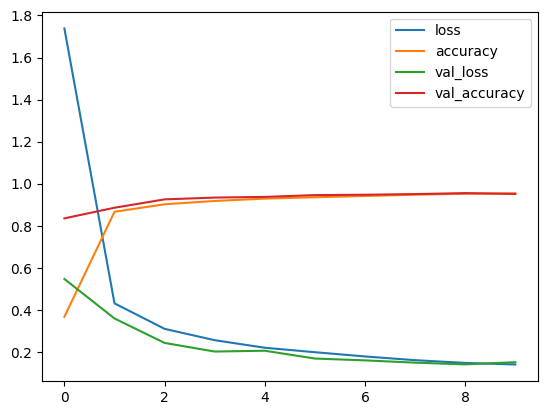

In [59]:
# Şimdi ise modelimizin sürecini görselleştirelim.
import pandas as pd
pd.DataFrame(history.history).plot()

In [60]:
# Şimdi test datası üzerinde modelimizi değerlendirelim
model.evaluate(X_test_padded, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1530 - accuracy: 0.9521


[0.15304681658744812, 0.9520999789237976]